1. Use iris flower dataset from sklearn library and try to form clusters of flowers using petal width and length features. Drop other two features for simplicity.
2. Figure out if any preprocessing such as scaling would help here.
3. Draw elbow plot and from that figure out optimal value of k.

In [103]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.datasets import load_iris
from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler

In [104]:
iris = load_iris()
dir(iris)

['DESCR',
 'data',
 'data_module',
 'feature_names',
 'filename',
 'frame',
 'target',
 'target_names']

In [105]:
list(iris.target_names)

['setosa', 'versicolor', 'virginica']

In [106]:
df = pd.DataFrame(data=iris.data, columns=iris.feature_names)
df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


## For Sepal

DataFrame

In [107]:
dfs = df[['sepal length (cm)', 'sepal width (cm)']]
dfs

,sepal length (cm),sepal width (cm)
0,5.1,3.5
1,4.9,3.0
2,4.7,3.2
3,4.6,3.1
4,5.0,3.6
...,...,...
145,6.7,3.0
146,6.3,2.5
147,6.5,3.0
148,6.2,3.4


Scatter Plot

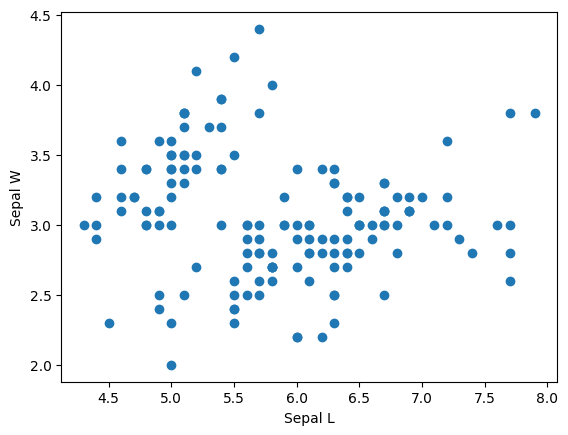

In [108]:
plt.xlabel('Sepal L')
plt.ylabel('Sepal W')
plt.scatter(dfs['sepal length (cm)'], dfs['sepal width (cm)'])

Elbow Plot

In [109]:
sse_s = []
k_rng_s = range(1,10)

for k in k_rng_s:
    km = KMeans(n_clusters=k)
    km.fit(dfs[['sepal length (cm)', 'sepal width (cm)']])
    sse_s.append(km.inertia_)

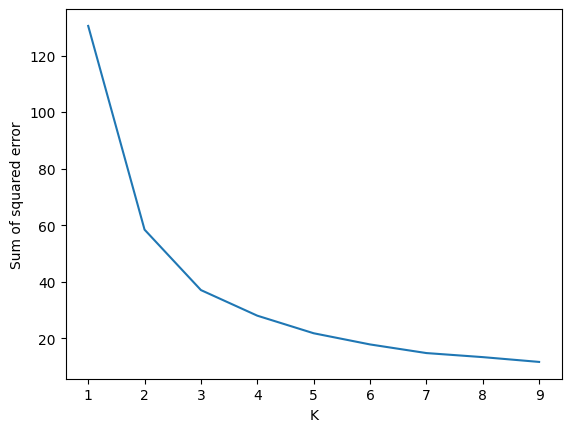

In [110]:
plt.xlabel('K')
plt.ylabel('Sum of squared error')
plt.plot(k_rng_s, sse_s)

k = 3, for Sepal

Checking for MinMaxScalar

In [111]:
# scalar = MinMaxScaler()

# scalar.fit(dfs[['sepal width (cm)']])
# dfs['sepal width (cm)'] = scalar.transform(dfs[['sepal width (cm)']])

# scalar.fit(dfs[['sepal length (cm)']])
# dfs['sepal length (cm)'] = scalar.transform(dfs[['sepal length (cm)']])

# dfs

No diff. i.e. ignore

Model Training

In [112]:
km = KMeans(n_clusters=3)
y_pred_s = km.fit_predict(dfs[['sepal length (cm)', 'sepal width (cm)']])
y_pred_s

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 0, 2, 0, 2, 0, 2, 0, 2, 2, 2, 2, 2, 2, 0,
       2, 2, 2, 2, 2, 2, 2, 2, 0, 0, 0, 0, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 0, 2, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 2, 2, 0, 0, 0, 0, 2, 0, 2, 0, 2, 0, 0, 2, 2, 0, 0, 0, 0,
       0, 2, 2, 0, 0, 0, 2, 0, 0, 0, 2, 0, 0, 0, 2, 0, 0, 2])

In [113]:
dfs['cluster'] = y_pred_s
dfs

C:\Users\Hp\AppData\Local\Temp\ipykernel_8328\230233762.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfs['cluster'] = y_pred_s


,sepal length (cm),sepal width (cm),cluster
0,5.1,3.5,1
1,4.9,3.0,1
2,4.7,3.2,1
3,4.6,3.1,1
4,5.0,3.6,1
...,...,...,...
145,6.7,3.0,0
146,6.3,2.5,2
147,6.5,3.0,0
148,6.2,3.4,0


Centroid Points of the following Clusters

In [114]:
km.cluster_centers_

array([[6.82391304, 3.07826087],
       [5.00392157, 3.40980392],
       [5.8       , 2.7       ]])

Scatter plot of Clusters

In [115]:
df1 = dfs[dfs.cluster==0]
df2 = dfs[dfs.cluster==1]
df3 = dfs[dfs.cluster==2]

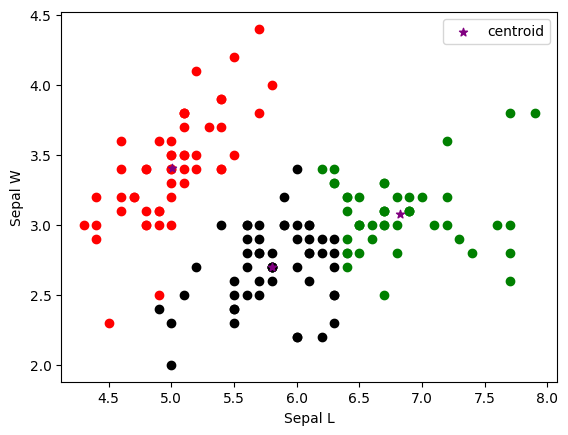

In [116]:
plt.scatter(df1['sepal length (cm)'], df1['sepal width (cm)'], color='green')
plt.scatter(df2['sepal length (cm)'], df2['sepal width (cm)'], color='red')
plt.scatter(df3['sepal length (cm)'], df3['sepal width (cm)'], color='black')

plt.scatter(km.cluster_centers_[:,0], km.cluster_centers_[:,1], color='purple', marker='*', label='centroid')

plt.xlabel('Sepal L')
plt.ylabel('Sepal W')
plt.legend()

## For Petal

DataFrame

In [117]:
dfp = df[['petal length (cm)', 'petal width (cm)']]
dfp

,petal length (cm),petal width (cm)
0,1.4,0.2
1,1.4,0.2
2,1.3,0.2
3,1.5,0.2
4,1.4,0.2
...,...,...
145,5.2,2.3
146,5.0,1.9
147,5.2,2.0
148,5.4,2.3


Scatter Plot

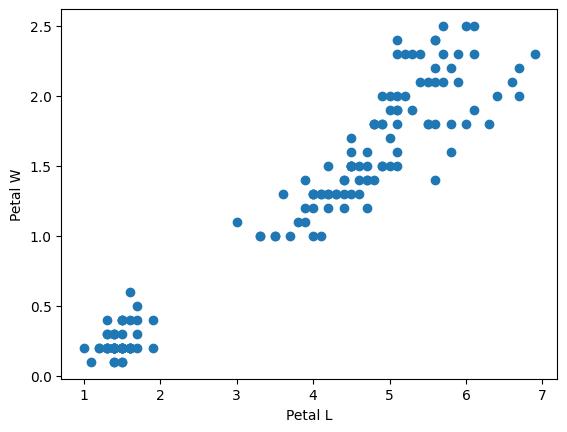

In [118]:
plt.xlabel('Petal L')
plt.ylabel('Petal W')
plt.scatter(dfp['petal length (cm)'], dfp['petal width (cm)'])

Elbow Plot

In [119]:
sse_p = []
k_rng_p = range(1,10)

for k in k_rng_p:
    km = KMeans(n_clusters=k)
    km.fit(dfp[['petal length (cm)', 'petal width (cm)']])
    sse_p.append(km.inertia_)

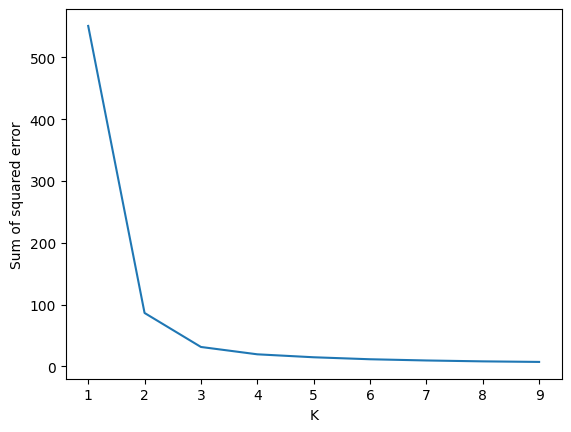

In [120]:
plt.xlabel('K')
plt.ylabel('Sum of squared error')
plt.plot(k_rng_p, sse_p)

k = 3, for Petal 

Checking for MinMaxScalar

In [121]:
# scalar = MinMaxScaler()

# scalar.fit(dfp[['petal width (cm)']])
# dfp['petal width (cm)'] = scalar.transform(dfp[['petal width (cm)']])

# scalar.fit(dfp[['petal length (cm)']])
# dfp['petal length (cm)'] = scalar.transform(dfp[['petal length (cm)']])

# dfp

No diff. i.e. ignore

Model Training

In [122]:
km = KMeans(n_clusters=3)
y_pred_p = km.fit_predict(dfp[['petal length (cm)', 'petal width (cm)']])
y_pred_p

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 2, 0, 0, 2, 2, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [123]:
dfp['cluster'] = y_pred_p
dfp

C:\Users\Hp\AppData\Local\Temp\ipykernel_8328\809365334.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfp['cluster'] = y_pred_p


,petal length (cm),petal width (cm),cluster
0,1.4,0.2,1
1,1.4,0.2,1
2,1.3,0.2,1
3,1.5,0.2,1
4,1.4,0.2,1
...,...,...,...
145,5.2,2.3,0
146,5.0,1.9,0
147,5.2,2.0,0
148,5.4,2.3,0


Centroid Points of the following Clusters

In [124]:
km.cluster_centers_

array([[5.62608696, 2.04782609],
       [1.462     , 0.246     ],
       [4.29259259, 1.35925926]])

Scatter plot for Clusters

In [125]:
df1 = dfp[dfp.cluster==0]
df2 = dfp[dfp.cluster==1]
df3 = dfp[dfp.cluster==2]

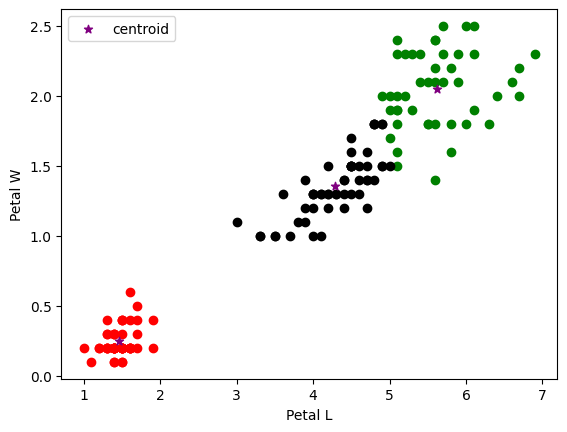

In [126]:
plt.scatter(df1['petal length (cm)'], df1['petal width (cm)'], color='green')
plt.scatter(df2['petal length (cm)'], df2['petal width (cm)'], color='red')
plt.scatter(df3['petal length (cm)'], df3['petal width (cm)'], color='black')

plt.scatter(km.cluster_centers_[:,0], km.cluster_centers_[:,1], color='purple', marker='*', label='centroid')

plt.xlabel('Petal L')
plt.ylabel('Petal W')
plt.legend()

## Comparison with original target values 

In [127]:
dft = df.copy()
dft['target'] = iris.target

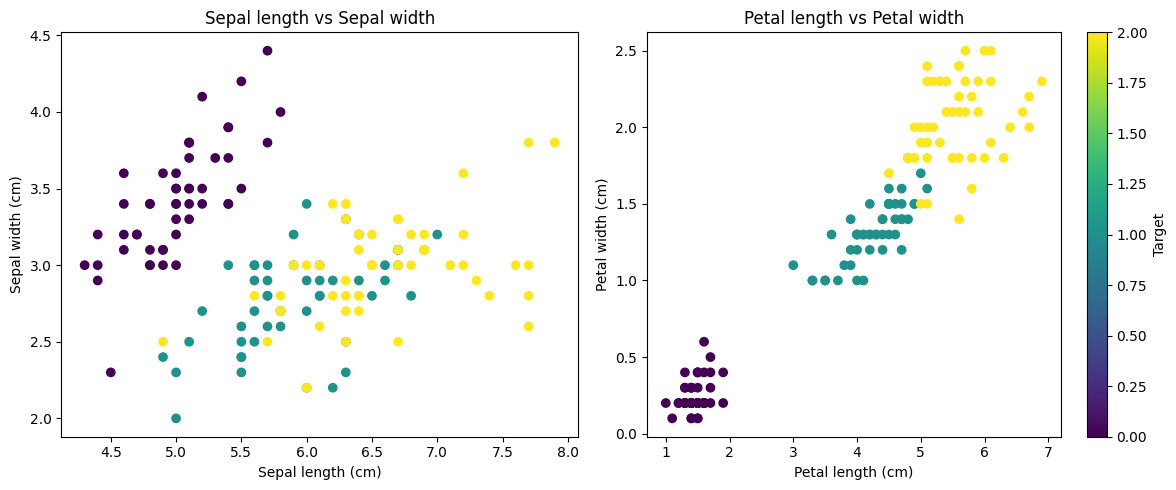

In [128]:
# Scatter plot for Sepal length vs Sepal width
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.scatter(dft['sepal length (cm)'], dft['sepal width (cm)'], c=dft['target'], cmap='viridis')
plt.title('Sepal length vs Sepal width')
plt.xlabel('Sepal length (cm)')
plt.ylabel('Sepal width (cm)')

# Scatter plot for Petal length vs Petal width
plt.subplot(1, 2, 2)
plt.scatter(dft['petal length (cm)'], dft['petal width (cm)'], c=dft['target'], cmap='viridis')
plt.title('Petal length vs Petal width')
plt.xlabel('Petal length (cm)')
plt.ylabel('Petal width (cm)')

plt.colorbar(label='Target')
plt.tight_layout()
plt.show()